In [1]:
import pandas as pd
import numpy as np
from h3 import h3
from keplergl import KeplerGl
import matplotlib.pyplot as plt 
import geopandas as gpd
import sys
sys.path.append('../src/')

from utils import load_pickle, save_pickle

# Shape files visualization

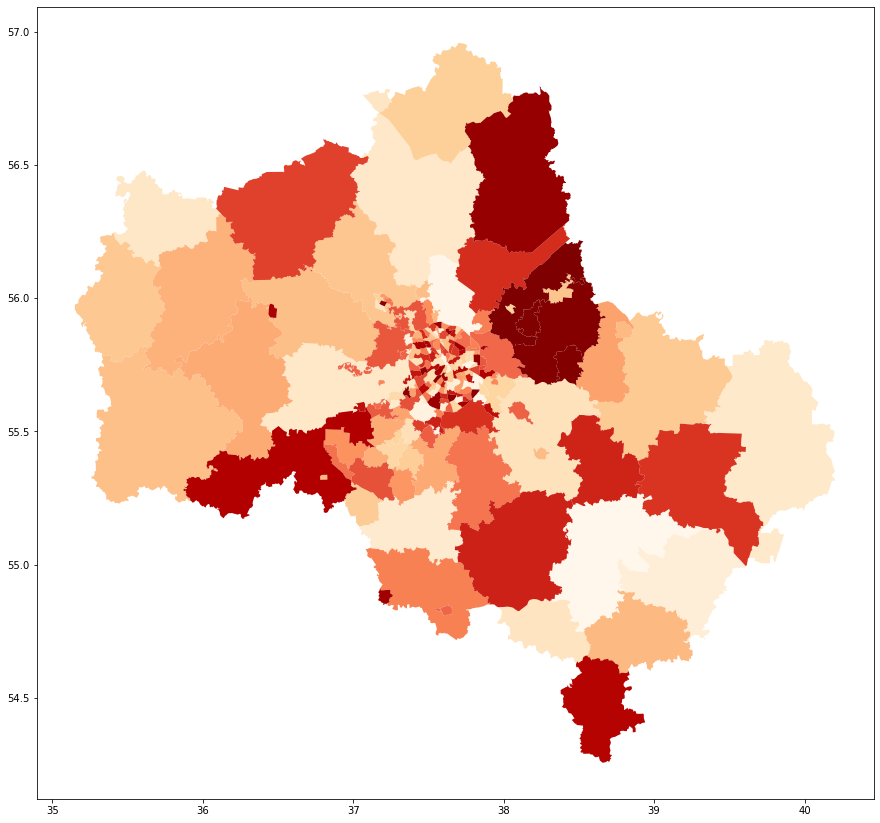

In [2]:
shape = gpd.read_file("../data/admzones2021/admzones2021.shp")
shape.plot(figsize=(15,15), cmap='OrRd');

In [3]:
shape.head()

,adm_zid,adm_name,okrug_name,sub_ter,okrug_id,area,geometry
0,519,Коломна,None,Московская область,NaN,1.728866e+09,"POLYGON ((38.30978 54.86069, 38.30978 54.86069..."
1,507,Дзержинский,None,Московская область,NaN,1.566430e+07,"POLYGON ((37.79389 55.62307, 37.79601 55.62424..."
2,109,Перово,Восточный административный округ,Старая Москва,561.0,9.829908e+06,"POLYGON ((37.75633 55.75959, 37.76380 55.76104..."
3,533,Мытищи,None,Московская область,NaN,4.312459e+08,"POLYGON ((37.73215 55.87984, 37.73064 55.88059..."
4,66,Тверской,Центральный административный округ,Старая Москва,569.0,7.322588e+06,"POLYGON ((37.61262 55.78248, 37.61457 55.78181..."


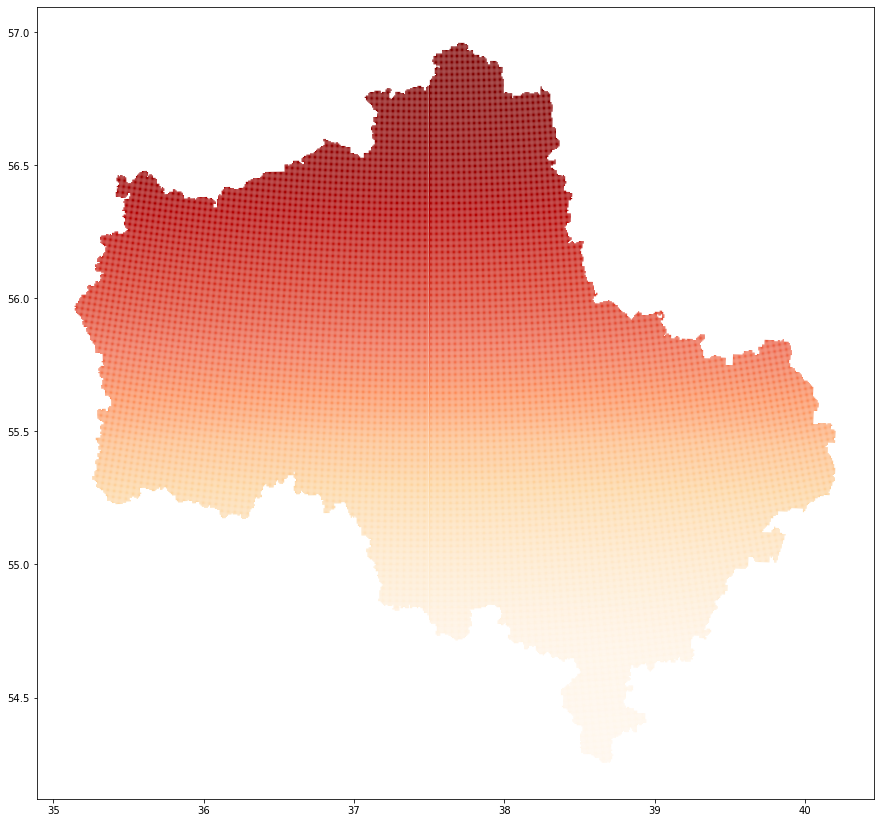

In [4]:
shape = gpd.read_file("../data/fishnet2021/fishnet2021.shp")
shape.plot(figsize=(15,15), cmap='OrRd');

# Features exploration

In [5]:
df_home_job = pd.read_csv("../data/01_CLocation_July.csv")
df_home_job1 = pd.read_csv("../data/01_Location_July.csv")
df_home_job = pd.concat([df_home_job1, df_home_job], 0)

df_home_job.rename(columns={'zid': 'cell_zid'}, inplace=True)

df_home_job = pd.merge(df_home_job, shape, on = ['cell_zid'])
df_home_job['geometry'] = df_home_job['geometry'].astype(str)

In [6]:
map_config = load_pickle("../configs/map_config_base.pkl")

map_1 = KeplerGl(height = 700, config = map_config)
map_1.add_data(df_home_job, name='shape')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'hab79n', 'type': '…

In [44]:
save_pickle(map_1.config, "../configs/map_config_base.pkl")

Короткие выводы:
    - данные файла 01_CLocation_July.csv выглядят нормально
    - данные файла 01_Location_July.csv кажутся сбитыми (большие значения на границе области, возможна сбивка индексов)
    - нет информации по мфц и прочей инвраструктуре